In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
dt, dr, dtheta, dphi, dphi_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi}")

In [4]:
a, delta, m, alpha = sympy.symbols("a delta m alpha")

In [5]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

### Metric

In [6]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2

In [7]:
metric_orig

Make change of variables.

In [8]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt

In [9]:
dphi_val

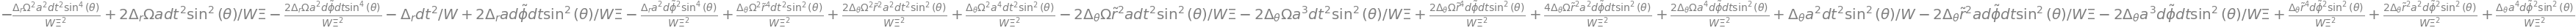

In [10]:
metric = metric_orig.subs({dphi: dphi_val}).expand()
metric

In [11]:
tau, dtau = sympy.symbols("tau d\\tau")

In [12]:
dt_val = sympy.I * dtau

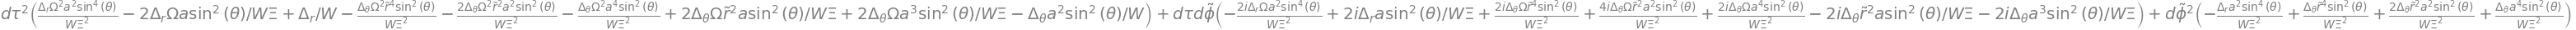

In [13]:
euclidean_metric = metric.subs({dt: dt_val}).collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric

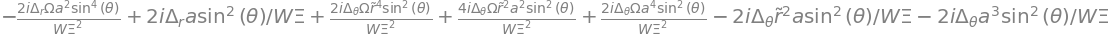

In [14]:
euclidean_metric.coeff(dphi_tilde * dtau)

In [15]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric.coeff(dtau * dphi_tilde) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric.coeff(dphi_tilde ** 2)

In [16]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡    2  2    4                  2                   2          4    2         
⎢Δᵣ⋅Ω ⋅a ⋅sin (θ)   2⋅Δᵣ⋅Ω⋅a⋅sin (θ)   Δᵣ   Δₜₕₑₜₐ⋅Ω ⋅\tilde{r} ⋅sin (θ)   2⋅Δ
⎢──────────────── - ──────────────── + ── - ──────────────────────────── - ───
⎢         2               W⋅Ξ          W                   2                  
⎢      W⋅Ξ                                              W⋅Ξ                   
⎢                                                                             
⎢                      2    4                2                          4    2
⎢              ⅈ⋅Δᵣ⋅Ω⋅a ⋅sin (θ)   ⅈ⋅Δᵣ⋅a⋅sin (θ)   ⅈ⋅Δₜₕₑₜₐ⋅Ω⋅\tilde{r} ⋅sin 
⎢            - ───────────────── + ────────────── + ──────────────────────────
⎢                        2              W⋅Ξ                         2         
⎣                     W⋅Ξ                                        W⋅Ξ          

       2          2  2    2              2  4    2                          2 
ₜₕₑₜₐ⋅Ω ⋅\tilde{r} ⋅a ⋅sin (θ)   Δₜₕₑₜₐ⋅Ω ⋅a ⋅sin (

In [17]:
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ──────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

  2              ⎛                      2           2⎞    2       2 ⎛         
in (θ) + 2⋅Ω⋅Ξ⋅a⋅⎝-Δᵣ + Δₜₕₑₜₐ⋅\tilde{r}  + Δₜₕₑₜₐ⋅

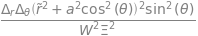

In [18]:
g_mat.det().simplify()

In [19]:
g_00 = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2 * sympy.sin(theta) ** 2
g_00

In [20]:
(g_00 / (W * xi ** 2) - g_mat[0, 0]).expand().simplify()

In [21]:
g_00

In [51]:
g_00_new = delta_r * (xi + a * (a - 1) * sympy.sin(theta) ** 2) ** 2 - delta_theta * sympy.sin(theta) ** 2 * (a * xi + (a - 1) * (r_tilde ** 2 + a ** 2)) ** 2
g_00_new

In [52]:
r_tilde_plus = sympy.symbols("\\tilde{r}_+")

In [53]:
delta_r_val = (r_tilde ** 2 - r_tilde_plus ** 2) ** 2 + (r_tilde_plus ** 2 + 1) ** 2 * ((r_tilde_plus - r_tilde) ** 2)
delta_r_val

In [54]:
xi_val = 1 - a ** 2
a_val = r_tilde_plus ** 2
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2
xi_val, a_val, delta_theta_val

In [55]:
g_00_simp = g_00_new.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp

In [56]:
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [61]:
A_coeff = g_00_simp.coeff(r_tilde).simplify()
A_coeff

In [62]:
B_coeff = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff

In [63]:
g_00_simp.coeff(r_tilde ** 3).simplify()

In [64]:
C_coeff = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff

In [65]:
D_coeff = g_00_simp - A_coeff * r_tilde - B_coeff * r_tilde ** 2 - C_coeff * r_tilde ** 4
D_coeff.simplify()